In [1]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

In [2]:
from helper import laplace_solution , plot_3d

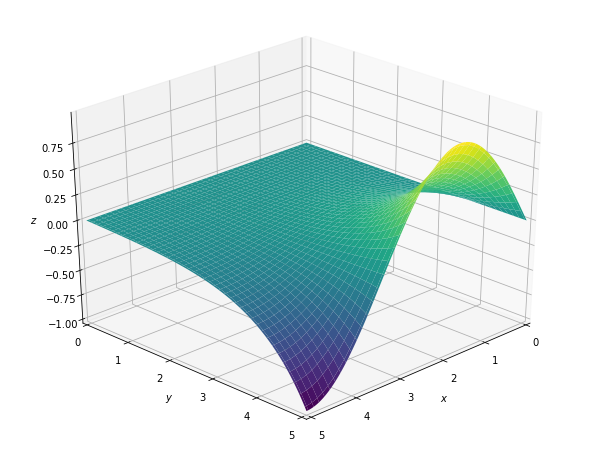

In [3]:
nx, ny = 128, 128
Lx, Ly = 5.0, 5.0
dx = Lx/(nx-1)
dy = Ly/(ny-1)

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

p_exact = laplace_solution(x, y, Lx, Ly)
plot_3d(x,y,p_exact)

In [7]:
def laplace2d_jacobi(p0, maxiter=20000, rtol=1e-8):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (p[:-2, 1:-1]+p[1:-1, :-2] + p[1:-1, 2:] + p[2:, 1:-1])
        p[1:-1, -1] = 0.25 * (pn[:-2, -1] + 2*pn[1:-1, -2] + pn[2:, -1])
        
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        
        ite += 1
        
    return p, ite, conv

In [8]:
p0 = numpy.zeros((ny,nx))
p0[-1,:] = numpy.sin(1.5 * numpy.pi*x/Lx)

In [9]:
%%time
p, ites, conv = laplace2d_jacobi(p0, rtol=1e-8)
print(ites, conv[-1])

19993 9.998616841297023e-09
CPU times: user 4.22 s, sys: 0 ns, total: 4.22 s
Wall time: 4.21 s


In [11]:
def laplace2d_jacobi_2(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                p[j, i] = 0.25 * (p[j-1, i]+p[j, i-1] + p[j, i+1] + p[j+1, i])
        for j in range(1,ny-1):
            p[j, -1] = 0.25 * (pn[j, -1] + 2*pn[j, -2] + pn[j+1, -1])
        
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        
        ite += 1
        
    return p, ite, conv

In [12]:
%%time
p, ites, conv = laplace2d_jacobi(p0, maxiter = 500)
print(ites, conv[-1])

500 0.000656396769336848
CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 107 ms


In [14]:
%%time
p, ites, conv = laplace2d_jacobi_2(p0, maxiter=500)
print(ites, conv[-1])

500 0.0006467174720456074
CPU times: user 8.56 s, sys: 36 ms, total: 8.6 s
Wall time: 8.6 s


In [16]:
def laplace2d_gauss_seidel(p0, maxiter = 20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                p[j, i] = 0.25 * (p[j-1, i]+p[j, i-1] + p[j, i+1] + p[j+1, i])
        for j in range(1,ny-1):
            p[j, -1] = 0.25 * (p[j, -1] + 2*p[j, -2] + p[j+1, -1])
        
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        
        ite += 1
        
    return p, ite, conv

In [17]:
%%time
p, ites, conv = laplace2d_gauss_seidel(p0, maxiter=500)
print(ites, conv[-1])

500 0.0006444298031240543
CPU times: user 8.48 s, sys: 0 ns, total: 8.48 s
Wall time: 8.47 s


In [18]:
import numba

In [19]:
from numba import jit

In [21]:
def fib(n):
    a, b = 1, 1
    for i in range (n-2):
        a, b = b, a + b
    return b

In [22]:
fib(3)

2

In [23]:
%%timeit
fib(500000)

4.76 s ± 645 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
@jit
def fib(n):
    a, b = 1, 1
    for i in range (n-2):
        a, b = b, a + b
    return b

In [27]:
%%timeit
fib(500000)

331 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
@jit
def laplace2d_jacobi_jit(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                p[j, i] = 0.25 * (pn[j-1, i]+pn[j, i-1] + pn[j, i+1] + pn[j+1, i])
        for j in range(1,ny-1):
            p[j, -1] = 0.25 * (pn[j, -1] + 2*pn[j, -2] + pn[j+1, -1])
        
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        
        ite += 1
        
    return p, ite, conv

In [32]:
%%timeit
p, ites, conv = laplace2d_jacobi_jit(p0, maxiter=100)


8.67 ms ± 346 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
